Similar words to 'machine': [('are', 0.34941166639328003), ('of', 0.3042498528957367), ('word2vec', 0.17796054482460022)]


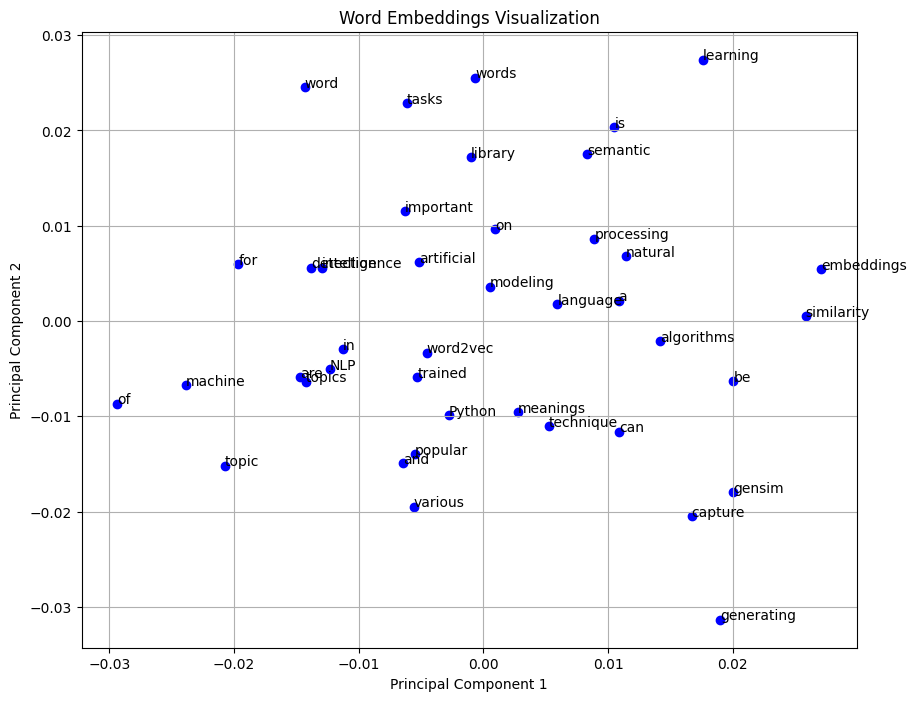

In [3]:
!pip install gensim
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample dataset (text data)
text_data = [
    "natural language processing and machine learning are important topics in artificial intelligence",
    "word embeddings capture semantic meanings of words",
    "word2vec is a popular technique for generating word embeddings",
    "gensim is a Python library for topic modeling and similarity detection",
    "machine learning algorithms can be trained on word embeddings for various NLP tasks"
]

# Save the text data to a file (optional step)
with open('text_data.txt', 'w') as file:
    for line in text_data:
        file.write(line + '\n')

# Train Word2Vec model
# Load text data from the file
sentences = LineSentence('text_data.txt')

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Find similar words
similar_words = model.wv.most_similar('machine', topn=3)
print("Similar words to 'machine':", similar_words)

# Visualize word embeddings using PCA
def visualize_embeddings(model):
    words = list(model.wv.key_to_index.keys())
    vectors = [model.wv[word] for word in words]

    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', color='b')

    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()

# Visualize word embeddings
visualize_embeddings(model)

In [4]:
import gensim.downloader as api

In [5]:
info= api.info()
for model_name, model_data in sorted(info['models'].items()):
    print(
    '%s (%d record): %s' %(
        model_name,
        model_data.get('num_records',-1),
        model_data['description'][:40]+'...'
        )
    )

__testing_word2vec-matrix-synopsis (-1 record): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 record): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 record): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 record): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 record): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 record): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 record): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 record): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 record): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-300 (400000 record): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-50 (400000 record): Pre-trained vectors based on Wikipedia 2...
word2vec-google-news-300 (3000000 record): Pre-trained vectors 

In [ ]:
wv=api.load('word2vec-google-news-300')

[=================---------------------------------] 34.3% 570.3/1662.8MB downloaded

In [ ]:
glove=api.load('glove-twitter-50')

In [ ]:
wv.most_similar("tea")

In [ ]:
glove.most_similar("tea")

In [ ]:
wv.distance("tea","coffee")